formula: 0.9999999994195402
simulation: 0.9999999994195394
<class 'numpy.float64'>
[1.00000000e+04 9.99000999e+00 4.99750125e+00 3.33222259e+00
 2.49937516e+00 1.99960008e+00 1.66638894e+00 1.42836738e+00
 1.24984377e+00 1.11098767e+00 9.99900010e-01 9.09008272e-01
 8.33263895e-01 7.69171602e-01 7.14234698e-01 6.66622225e-01
 6.24960940e-01 5.88200694e-01 5.55524693e-01 5.26288090e-01
 4.99975001e-01 4.76167802e-01 4.54524794e-01 4.34763706e-01
 4.16649306e-01 3.99984001e-01 3.84600592e-01 3.70356653e-01
 3.57130102e-01 3.44815696e-01 3.33322223e-01 3.22570240e-01
 3.12490235e-01 3.03021121e-01 2.94108997e-01 2.85706123e-01
 2.77770062e-01 2.70262966e-01 2.63150970e-01 2.56403682e-01
 2.49993750e-01 2.43896490e-01 2.38089569e-01 2.32552731e-01
 2.27267562e-01 2.22217284e-01 2.17386579e-01 2.12761431e-01
 2.08328993e-01 2.04077468e-01 1.99996000e-01 1.96074587e-01
 1.92303994e-01 1.88675685e-01 1.85181756e-01 1.81814876e-01
 1.78568240e-01 1.75435519e-01 1.72410821e-01 1.69488653e-01
 1

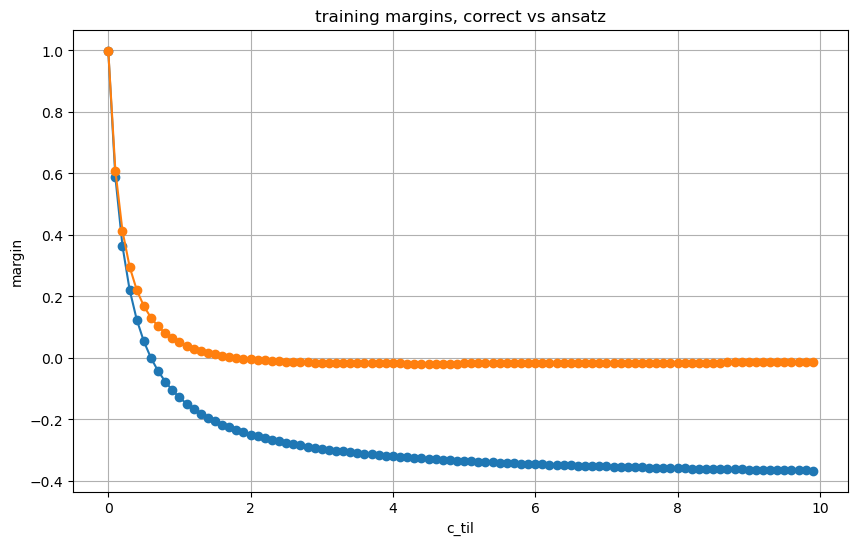

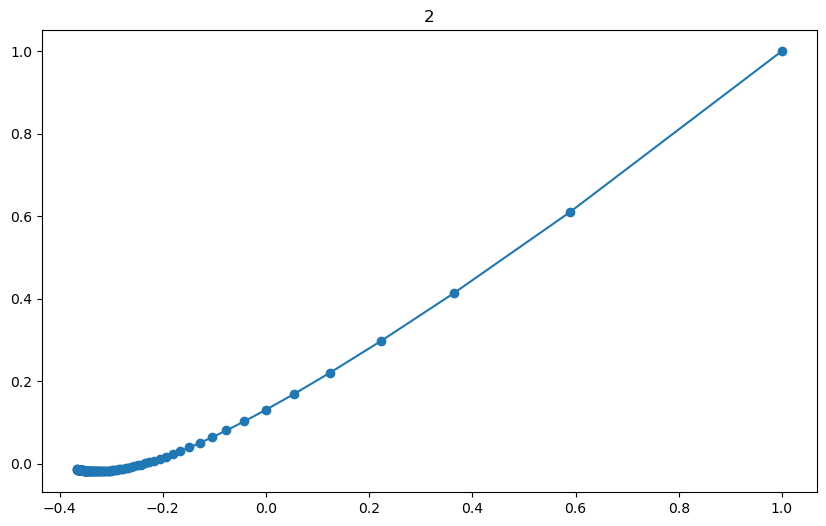

In [5]:
import numpy as np
from Ranking_exp import Ranking_exp
import matplotlib.pyplot as plt

# Util
def lamb_calc(c_reg,k_o):
    alpha = 1-2*k_o
    return np.arccosh((1+1/c_reg)/(1-alpha))

def sinh(x):
    return np.sinh(x)

def tanh(x):
    return np.tanh(x)

def cosh(x):
    return np.cosh(x)

def m(k_o,c_til):
    alpha = 1-2*k_o
    m = alpha / ( alpha + (1/c_til) )
    return m

def g(k_o,c_til):
    return 1-m(k_o,c_til)

def training(j,p,q,k_o,c_til,n):
    m_val = m(k_o,c_til)
    g = 1-m_val
    k_s = 1
    k_d = 0
    sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_til)
    ranks = sim.calc_rank()
    # print('calc_rank', ranks)
    # j-1 since we have 0 indexing
    training = m_val + g * (ranks[j-1] - ranks[j])
    print('formula:', training)
    print('simulation:', sim.f_j_k(j,j+1))
    print(type(sim.f_j_k(j,j+1)))
    # assert np.isclose(training, sim.f_j_k(j,j+1))
    # print(ranks[j-1])
    # return training
    return training, sim.f_j_k(j,j+1)

j = 4
p = 5
q = 3
k_o = 0.4
c_til = 1e10
n = 7

training(j,p,q,k_o,c_til,n)
c_var_vals = np.arange(1e-4, 10, 0.1)
c_til_vals = 1/(c_var_vals)
print(c_til_vals)
correct_margin_arr = []
test_margin_arr = []
for i in range(0, len(c_til_vals)):
    print(f'test:{i}, c_til = {c_til_vals[i]}.3f')
    correct_training, test_margin = training(j,p,q,k_o,c_til_vals[i],n)
    correct_margin_arr.append(correct_training)
    test_margin_arr.append(test_margin)

plt.figure(figsize=(10, 6))
plt.title(f'training margins, correct vs ansatz')
plt.plot(c_var_vals, correct_margin_arr, marker='o', label=f'correct_margin_arr')
plt.plot(c_var_vals, test_margin_arr, marker='o', label=f'test_margin_arr')
plt.xlabel('c_til')
plt.ylabel('margin')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.title(f'2')
plt.plot(correct_margin_arr, test_margin_arr, marker='o', label=f'correct_margin_arr')
# print(len(c_til_vals))

In [8]:
test_margin_arr[0][0]

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.title(f'training margins, correct vs ansatz')
plt.plot(c_var_vals, correct_margin_arr, marker='o', label=f'correct_margin_arr')
plt.plot(c_var_vals, test_margin_arr, marker='o', label=f'test_margin_arr')
# plt.xlabel('c_til')
# plt.ylabel('margin')
# plt.grid(True)
# plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.title(f'training margins, correct vs ansatz')
plt.plot(c_var_vals, correct_margin_arr, marker='o', label=f'correct_margin_arr')
plt.plot(c_var_vals, test_margin_arr, marker='o', label=f'test_margin_arr')
plt.xlabel('c_til')
plt.ylabel('margin')
plt.grid(True)
plt.show()
